In [83]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations, groupby
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder
from sklearn import linear_model
import sys

In [84]:
orders = pd.read_csv('instacart_2017_05_01/my_orders.csv').dropna()
products = pd.read_csv('instacart_2017_05_01/products.csv').dropna()
aisles = pd.read_csv('instacart_2017_05_01/aisles.csv').dropna()
departments = pd.read_csv('instacart_2017_05_01/departments.csv').dropna()

orders_products = pd.read_csv('instacart_2017_05_01/my_order_products__prior.csv').dropna()

orders_products.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
0,83830,8938,49235,1,1
1,83831,8938,13032,2,1
2,83832,8938,26348,3,1
3,83833,8938,5028,4,1
4,83834,8938,15680,5,1


In [85]:
unique_orderids = orders_products["order_id"].unique()

used_products = []
mix_column = []
days_column = []

for i in unique_orderids:
    product_ids = orders_products.loc[orders_products['order_id'] == i]["product_id"].values
    days = orders.loc[orders["order_id"] == i]["days_since_prior_order"].values
    if(len(days) > 0):
        days = days[0]    
        days_column.append(days)
    else:
        days = 0   
        days_column.append(days)
    str_column = []
    for p in product_ids:
        product_name = products.loc[p]["product_name"]
        str_column.append(product_name)
        used_products.append(product_name)
    mix_column.append(','.join(str_column))
 
df = pd.DataFrame(unique_orderids)
df["mix"] = mix_column
df["days"] = days_column
df.columns = ["order_id","mix","days"]

df = df.dropna()
df.head()

,order_id,mix,days
0,8938,"80% Lean Ground Beef,Grape Nut Flakes Cereal,S...",12.0
1,35204,"Sweet Peppers, Organic, Fire Roasted,White Win...",9.0
2,36495,"Extra Strength Acetaminophen Caplets,Shredded ...",7.0
3,40262,"Wrappers Pre-cut Pop Up Foil Sheets,Almond Pas...",4.0
4,54652,Short Cuts Rotisserie Seasoned Carved Chicken ...,9.0


In [86]:
for p in used_products:
    df[p] = df["mix"].str.contains(p)
    
df.head()

C:\Users\snolan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,order_id,mix,days,80% Lean Ground Beef,Grape Nut Flakes Cereal,Salty Caramel Ice Cream,Chocolate Chip With Vanilla Bean Ice Cream,Cream Style Golden Corn,"Valdosta Pecans With Cranberries, Black Pepper & Orange Zest",Double Roll Bath Tissue Soft,...,Clean Curve Dishwand,Beyond Simply 9 Ranch Raised Lamb & Whole Barley Recipe Dog Food,Original Antacid & Pain Relief Tablets 36 Ct,Salted Caramel Ice Cream,Relight Candles,Halloween Cake Mix,Gluten Free All Purpose Baking Flour,100% Organic All-Natural Dried Pineapple,Classic Melba Rounds,Dark Chocolate Cranberries
0,8938,"80% Lean Ground Beef,Grape Nut Flakes Cereal,S...",12.0,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,35204,"Sweet Peppers, Organic, Fire Roasted,White Win...",9.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,36495,"Extra Strength Acetaminophen Caplets,Shredded ...",7.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,40262,"Wrappers Pre-cut Pop Up Foil Sheets,Almond Pas...",4.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,54652,Short Cuts Rotisserie Seasoned Carved Chicken ...,9.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [87]:
y = df["days"].dropna().copy()
X = df.copy()
X.drop(['order_id','mix','days'], axis=1, inplace=True)
X.head()

,80% Lean Ground Beef,Grape Nut Flakes Cereal,Salty Caramel Ice Cream,Chocolate Chip With Vanilla Bean Ice Cream,Cream Style Golden Corn,"Valdosta Pecans With Cranberries, Black Pepper & Orange Zest",Double Roll Bath Tissue Soft,"Sweet Peppers, Organic, Fire Roasted",White Wine,Garden Strawberry Fruit Spread,...,Clean Curve Dishwand,Beyond Simply 9 Ranch Raised Lamb & Whole Barley Recipe Dog Food,Original Antacid & Pain Relief Tablets 36 Ct,Salted Caramel Ice Cream,Relight Candles,Halloween Cake Mix,Gluten Free All Purpose Baking Flour,100% Organic All-Natural Dried Pineapple,Classic Melba Rounds,Dark Chocolate Cranberries
0,True,True,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [89]:
model = linear_model.LinearRegression()
def findNextBestPredictor(X,foundPredictors):
    nP = X.shape[1] # number of columns in X
    allPredictors = list(X) # See https://stackoverflow.com/a/19483025
    predictorsToSearch = set(allPredictors) - set(foundPredictors)
    maxScore = 0 # can usually do better than this!
    for predictor in predictorsToSearch: # loop over all remaining columns (predictors) in X
        trialPredictors = set(foundPredictors)
        trialPredictors.add(predictor) # Add this predictor to the existing predictors
        XcolSubset = X.loc[:,trialPredictors] # all rows and just the trial predictors
        #print(y)
        model.fit(XcolSubset, y) # fit the model to y
        score = model.score(XcolSubset, y)
        if score > maxScore: # identify the largest score and its associated predictor
            maxScore = score
            bestPredictorFound = predictor

    return (maxScore, bestPredictorFound)

findNextBestPredictor(X, list())

(0.0554984396535767, 'Vodka, Triple Distilled, Twist of Vanilla')

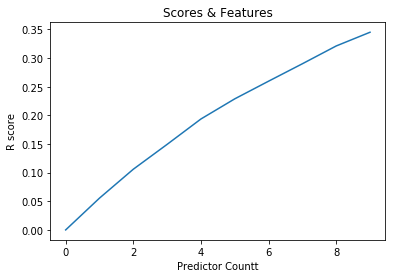

In [92]:
nP = X.shape[1]
scores = [0]
foundPredictors = list()

for i in range(1,10): # see if adding 10 predictors can increase r score
    (score, bestPredictorFound) = findNextBestPredictor(X, foundPredictors)
    foundPredictors.append(bestPredictorFound)
    scores.append(score)
    
plt.title("Scores & Features")
plt.xlabel('Predictor Countt') 
plt.ylabel('R score')
plt.plot(scores)